In [78]:
# ==============================================================================
# Initial Data Preprocessing
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# load data
housing = pd.read_csv('sample_data/california_housing_train.csv')

# delete columns of text type and target variable
col_list = list(housing)
col_list.remove('median_house_value')

# generate a new dataframe that consist of numeric type only
housing_numeric = housing[col_list]
housing_scaled = StandardScaler().fit_transform(housing[col_list])
housing_scaled_df = pd.DataFrame(housing_scaled, index=housing_numeric.index, columns=housing_numeric.columns)

# Concatenate
housing = pd.concat([housing_scaled_df, housing['median_house_value']], axis=1)

# training - test seperation
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

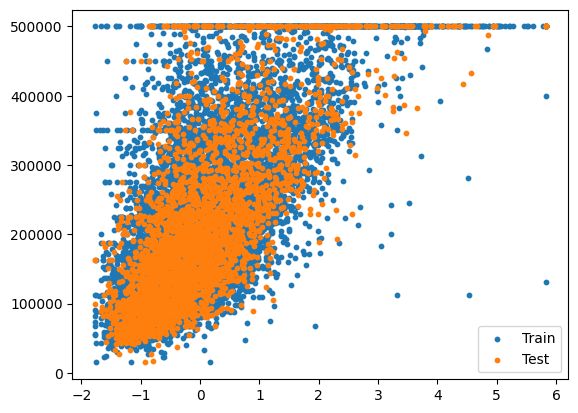

In [79]:
# =============================================================================
# Assignment One
# =============================================================================

# Making the different series
train_income = train_set["median_income"].copy()
train_target = train_set["median_house_value"].copy()
test_income = test_set["median_income"].copy()
test_target = test_set["median_house_value"].copy()

# Plot the results
plt.scatter(train_income, train_target, label='Train', s=10)
plt.scatter(test_income, test_target, label='Test', s=10)
plt.legend()
plt.show()

In [80]:
# =============================================================================
# Assignment Two
# =============================================================================

# Reshape the data for it to be usable in the linear regression model
train_income_reshaped = np.array(train_income).reshape(-1, 1)

# Create a linear regression model and fit the data
lin_reg = LinearRegression()
lin_reg.fit(train_income_reshaped, train_target)

# Print the results
print("Learned Parameters : ")
print("Coefficients: " , lin_reg.coef_)
print("bias: " , lin_reg.intercept_)
print("Train_r2_score : ", r2_score(train_target, lin_reg.predict(train_income_reshaped)))

Learned Parameters : 
Coefficients:  [79510.42048857]
bias:  207066.73462351796
Train_r2_score :  0.4736407292966299


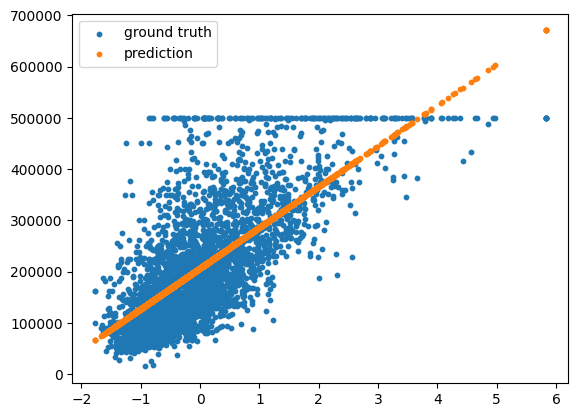

In [81]:
# =============================================================================
# Assignment Three
# =============================================================================

# Reshape the data for it to be usable in the linear regression model
test_income_reshaped = np.array(test_income).reshape(-1, 1)

# Get the predictions from the model
test_predictions = lin_reg.predict(test_income_reshaped)

# Plot the results
plt.scatter(test_income, test_target, label='ground truth', s=10)
plt.scatter(test_income, test_predictions, label='prediction', s=10)
plt.legend()
plt.show()